In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_images,train_labels),(test_images,test_labels)=keras.datasets.mnist.load_data()
print(train_images.shape)

11493376/11490434 [==============================] - 3s 0us/step
(60000, 28, 28)


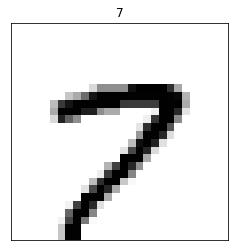

In [ ]:
i=123
plt.figure()
plt.imshow(train_images[i],cmap='gray_r')
plt.xticks([])
plt.yticks([])
plt.title(train_labels[i])
plt.show()

In [ ]:
train_images_norm=train_images.reshape(-1,784).astype('float32')/255.0
test_images_norm=test_images.reshape(-1,784).astype('float32')/255.0

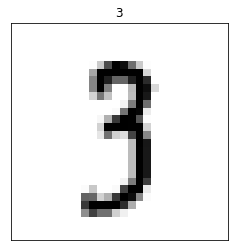

In [ ]:
i=856
plt.figure()
plt.imshow(train_images_norm[i].reshape(28,28),cmap='gray_r')
plt.xticks([])
plt.yticks([])
plt.title(train_labels[i])
plt.show()


In [ ]:


model = keras.Sequential([
    keras.Input(shape=28*28),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:

# h = model.fit(x=train_images_norm, y=train_labels, epochs=5, batch_size=64, validation_split=0.3)

h = model.fit(x=train_images_norm, y=train_labels, epochs=10,validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 1s 775us/step - loss: 0.0526 - accuracy: 0.9838 - val_loss: 0.0576 - val_accuracy: 0.9813
Epoch 2/10
1313/1313 [==============================] - 1s 728us/step - loss: 0.0469 - accuracy: 0.9850 - val_loss: 0.0658 - val_accuracy: 0.9792
Epoch 3/10
1313/1313 [==============================] - 1s 724us/step - loss: 0.0419 - accuracy: 0.9868 - val_loss: 0.0751 - val_accuracy: 0.9756
Epoch 4/10
1313/1313 [==============================] - 1s 723us/step - loss: 0.0393 - accuracy: 0.9874 - val_loss: 0.0851 - val_accuracy: 0.9740
Epoch 5/10
1313/1313 [==============================] - 1s 725us/step - loss: 0.0379 - accuracy: 0.9876 - val_loss: 0.0746 - val_accuracy: 0.9776
Epoch 6/10
1313/1313 [==============================] - 1s 736us/step - loss: 0.0343 - accuracy: 0.9890 - val_loss: 0.0736 - val_accuracy: 0.9779
Epoch 7/10
1313/1313 [==============================] - 1s 743us/step - loss: 0.0317 - accuracy: 0.9899 - val_loss: 0.0827 -

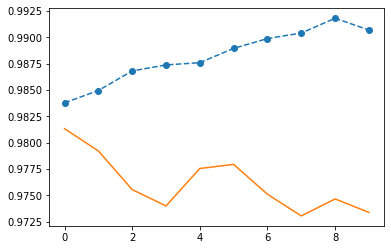

In [ ]:
plt.figure()
plt.plot(h.history['accuracy'],'--o')
plt.plot(h.history['val_accuracy'])
plt.show()


In [ ]:
test_loss,test_acc=model.evaluate(test_images_norm,test_labels)

313/313 [==============================] - 0s 414us/step - loss: 0.1486 - accuracy: 0.9671


In [ ]:
p=model.predict(test_images_norm)
print(p[0])

[1.3592455e-14 2.9054728e-14 2.8940494e-08 5.0929862e-06 6.0346574e-21
 4.7892853e-13 2.5250453e-18 9.9999487e-01 2.4361113e-10 7.5409221e-11]


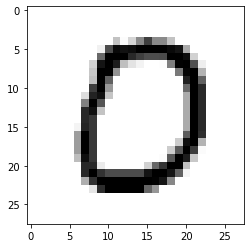

In [ ]:
i=10
plt.imshow(test_images_norm[i].reshape(28,28),cmap='gray_r')

<BarContainer object of 10 artists>

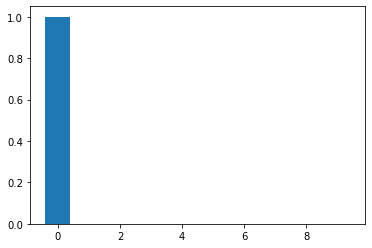

In [ ]:
plt.bar(range(10),p[i])